In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [99]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils as utils

import matplotlib.pyplot as plt
from tqdm import tqdm

In [31]:
data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
data.shape
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#read in X and Y as numpy arrays
X = np.array(data)
Y = np.array(data)
X = X[:,1:]
Y = Y[:,0]
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

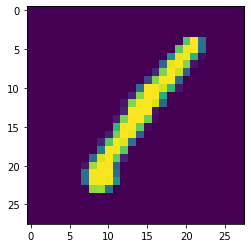

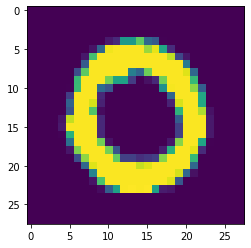

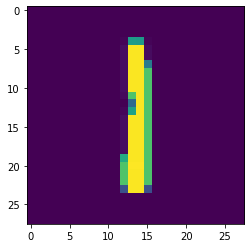

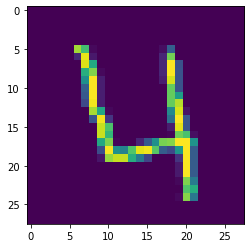

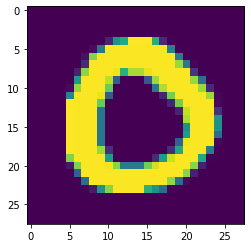

In [59]:
#reshape rows of X into 28 x 28 2D arrays
img1 = np.reshape(X[0],(28,28))
img2 = np.reshape(X[1],(28,28))
img3 = np.reshape(X[2],(28,28))
img4 = np.reshape(X[3],(28,28))
img5 = np.reshape(X[4],(28,28))

#visualise 5 images
imgplot = plt.imshow(img1)
plt.show()
imgplot = plt.imshow(img2)
plt.show()
imgplot = plt.imshow(img3)
plt.show()
imgplot = plt.imshow(img4)
plt.show()
imgplot = plt.imshow(img5)
plt.show()

In [82]:
#get tensors
Xtensor = torch.from_numpy(X).type(torch.float)
Ytensor = torch.from_numpy(Y)

#split into training and validation
X_train, X_validation, Y_train, Y_validation = Xtensor[:33600],Xtensor[33600:], Ytensor[:33600],Ytensor[33600:]

In [105]:
#create model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(784,50,True)
        self.layer2 = nn.Linear(50,20,True)
        self.layer3 = nn.Linear(20,10,True)
        self.activation = nn.ReLU()
    
    #how data pass through
    def forward(self,x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        x = self.activation(x)
        x = self.layer3(x)
        return x
    
#creating an instance of the class Net
NeuralNet = Net()
a = NeuralNet(X_train)

In [106]:
#training the model for x epochs
criterion = nn.CrossEntropyLoss()
optimiser = optim.Adam(NeuralNet.parameters())
epochs = 1000 
training_loss = []
validation_loss = []

for x in tqdm(range(0,epochs), desc = "Epoch No.:"):
    NeuralNet.zero_grad()
    output = NeuralNet(X_train)
    loss = criterion(output,Y_train)
    training_loss.append(loss.item())
    loss.backward()
    optimiser.step()
    with torch.no_grad(): 
        output = NeuralNet(X_validation)
        loss = criterion(output, Y_validation)
        validation_loss.append(loss.item())

Epoch No.:: 100%|██████████| 1000/1000 [01:37<00:00, 10.27it/s]


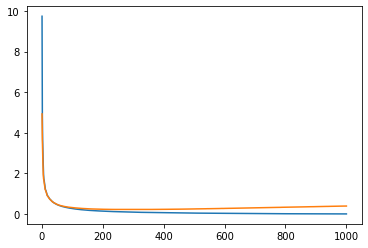

In [107]:
#visualising training and validation loss
plt.plot([x for x in range(1,1001)],training_loss)
plt.plot([x for x in range(1,1001)],validation_loss)

949


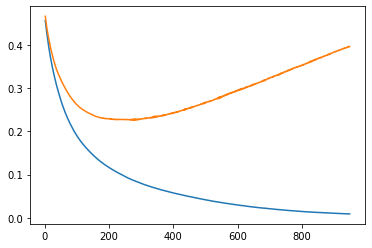

In [108]:
loss_wout_50_t = training_loss[51:]
loss_wout_50_v = validation_loss[51:]
print(len(loss_wout_50_t))
plt.plot([x for x in range(1,950)],loss_wout_50_t)
plt.plot([x for x in range(1,950)],loss_wout_50_v)